In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

/Users/michelle/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Part 1: Read and Load the Dataset¶

In [2]:
sentimental_df = pd.read_csv('./training.1600000.processed.noemoticon.csv',header=None)
sentimental_df.columns = ['sentiment','ids','date','flag','user','text']
sentimental_df.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
sentimental_df['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [4]:
from datetime import datetime

def return_day_of_week(date):
    day_of_week = date.split(' ')[0]
    return day_of_week

def return_month(date):
    day_of_week = date.split(' ')[1]
    return day_of_week

def return_day(date):
    day_of_week = date.split(' ')[2]
    return day_of_week

def return_time(date):
    day_of_week = date.split(' ')[3]
    return day_of_week

def return_timezone(date):
    day_of_week = date.split(' ')[4]
    return day_of_week

def return_year(date):
    day_of_week = date.split(' ')[5]
    return day_of_week
    
sentimental_df['day_of_week']=sentimental_df['date'].apply(return_day_of_week)
sentimental_df['month']=sentimental_df['date'].apply(return_month)
sentimental_df['day']=sentimental_df['date'].apply(return_day)
sentimental_df['time']=sentimental_df['date'].apply(return_time)
sentimental_df['timezone']=sentimental_df['date'].apply(return_timezone)
sentimental_df['year']=sentimental_df['date'].apply(return_year)

sentimental_df['year'] = sentimental_df['year'].astype(int)
sentimental_df['day'] = sentimental_df['day'].astype(int)

In [5]:

sentimental_df.to_csv('sentimental_df.csv')

In [6]:
sentimental_df

,sentiment,ids,date,flag,user,text,day_of_week,month,day,time,timezone,year
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Mon,Apr,6,22:19:45,PDT,2009
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Mon,Apr,6,22:19:49,PDT,2009
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Mon,Apr,6,22:19:53,PDT,2009
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Mon,Apr,6,22:19:57,PDT,2009
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Mon,Apr,6,22:19:57,PDT,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Tue,Jun,16,08:40:49,PDT,2009
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,Tue,Jun,16,08:40:49,PDT,2009
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Tue,Jun,16,08:40:49,PDT,2009
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Tue,Jun,16,08:40:49,PDT,2009


## Part 2: Exploratory Data Analysis

In [29]:
sentimental_df.shape

(1600000, 12)

In [30]:
sentimental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   sentiment    1600000 non-null  int64 
 1   ids          1600000 non-null  int64 
 2   date         1600000 non-null  object
 3   flag         1600000 non-null  object
 4   user         1600000 non-null  object
 5   text         1600000 non-null  object
 6   day_of_week  1600000 non-null  object
 7   month        1600000 non-null  object
 8   day          1600000 non-null  int64 
 9   time         1600000 non-null  object
 10  timezone     1600000 non-null  object
 11  year         1600000 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 146.5+ MB


In [31]:
sentimental_df['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [32]:
## check for missing value
sentimental_df.isnull().sum()

sentiment      0
ids            0
date           0
flag           0
user           0
text           0
day_of_week    0
month          0
day            0
time           0
timezone       0
year           0
dtype: int64

Class distribution 

<AxesSubplot:title={'center':'Distribution of sentiment'}, xlabel='sentiment'>

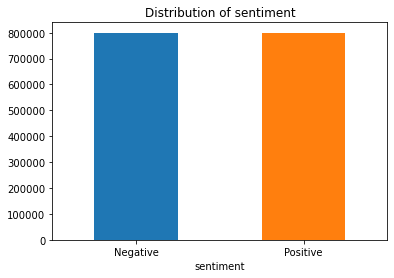

In [33]:
plt = sentimental_df.groupby('sentiment')['sentiment'].count().plot(kind='bar', title='Distribution of sentiment',color = ['#1f77b4', '#ff7f0e'],
                                               legend=False)
plt.set_xticklabels(['Negative','Positive'], rotation=0)
plt

As we can see from the graphs, we have equal number of Positive/Negative tweets. Both equaling to 800,000 tweets. This means our dataset is not skewed which makes working on the dataset easier for us.

## User distribution

<AxesSubplot:title={'center':'Distribution of sentiment'}, xlabel='user'>

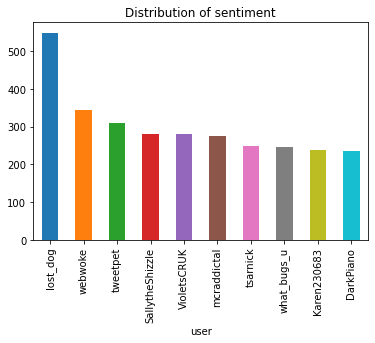

In [34]:
people = sentimental_df.groupby('user').count().sort_values(by = 'sentiment', ascending=False)['sentiment'][0:10]
people.plot(kind='bar', title='Distribution of sentiment',legend=False,color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

In [14]:
df = sentimental_df.groupby(['user','sentiment']).count()


ids  date  flag  text  day_of_week  month  day  \
user            sentiment                                                   
000catnap000    0            1     1     1     1            1      1    1   
                4            5     5     5     5            5      5    5   
000matthewkelly 4            1     1     1     1            1      1    1   
000yea000       4            1     1     1     1            1      1    1   
0010x0010       4            1     1     1     1            1      1    1   
...                        ...   ...   ...   ...          ...    ...  ...   
zzztar          4            2     2     2     2            2      2    2   
zzzum           4            1     1     1     1            1      1    1   
zzzunzinnn      4            3     3     3     3            3      3    3   
zzzyourdreamzzz 0            1     1     1     1            1      1    1   
zzzzeus111      0            1     1     1     1            1      1    1   

                           time  timezone  year  
user            sentiment                        
000catnap000    0             1         1     1  
                4             5         5     5  
000matthewkelly 4             1         1     1  
000yea000       4             1         1     1  
0010x0010       4             1         1     1  
...                         ...       ...   ...  
zzztar          4             2         2     2  
zzzum           4             1         1     1  
zzzunzinnn      4             3         3     3  
zzzyourdreamzzz 0             1         1     1  
zzzzeus111      0             1         1     1  

[792240 rows x 10 columns]

In [35]:
people_list = list(people.index)

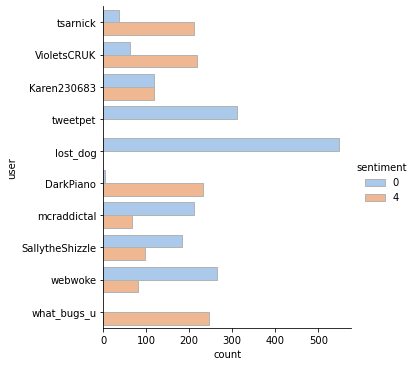

In [36]:
sns.catplot(y="user", kind="count",hue="sentiment",palette="pastel", edgecolor=".7",data=sentimental_df[sentimental_df.user.isin(people_list)])



## emtion composition over time

In [68]:
def return_pos_neg(month):
    pos, neg = [-1]*3, [-1]*3
    df = sentimental_df[(sentimental_df.month == month)]
    pos[0], pos[1], pos[2] = len(df[(df['day']<=10) & (df['sentiment']==4)]), len(df[(df['day']>10) & (df['day']<=20) & (df['sentiment']==4)]), len(df[(df['day']>20) & (df['sentiment']==4)])
    neg[0], neg[1], neg[2] = len(df[(df['day']<=10) & (df['sentiment']==0)]), len(df[(df['day']>10) & (df['day']<=20) & (df['sentiment']==0)]), len(df[(df['day']>20) & (df['sentiment']==0)])
    return pos, neg

pos, neg = [], []
for mon in sentimental_df['month'].unique():
    a, b = return_pos_neg(mon)
    pos.append(a)
    neg.append(b)

pos = [item for sublist in pos for item in sublist] 
neg = [item for sublist in neg for item in sublist] 

posBars = [i/(i+j) for i,j in zip(pos, neg)]
negBars = [j/(i+j) for i,j in zip(pos, neg)]

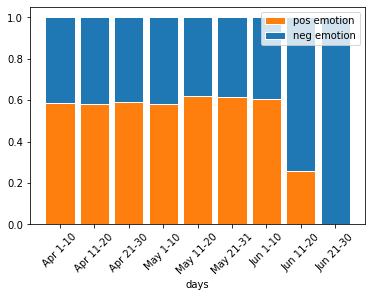

In [69]:
import matplotlib.pyplot as plt

def sumzip(*items):
    return [sum(values) for values in zip(*items)]

r = np.array(range(9))
fig, ax = plt.subplots()
ax.bar(r, posBars, color='#ff7f0e', edgecolor='white', width=0.85, label = 'pos emotion', align="center")
ax.bar(r, negBars, bottom=sumzip(posBars), color='#1f77b4', edgecolor='white', width=0.85, label = 'neg emotion', align="center")
plt.margins()

# Custom x axis
plt.xticks(r, ['Apr 1-10', 'Apr 11-20', 'Apr 21-30', 'May 1-10', 'May 11-20', 'May 21-31','Jun 1-10', 'Jun 11-20', 'Jun 21-30'],rotation=45)
plt.xlabel("days")
plt.legend()
plt.show()

In [3]:
a = [1,2,3]
sum(a)

6